### Simulação da solução de
$\dot{x}=f(x), \quad f(x)=-4x+x^3, x(0) = x_0$

numerical error for dynamics plot


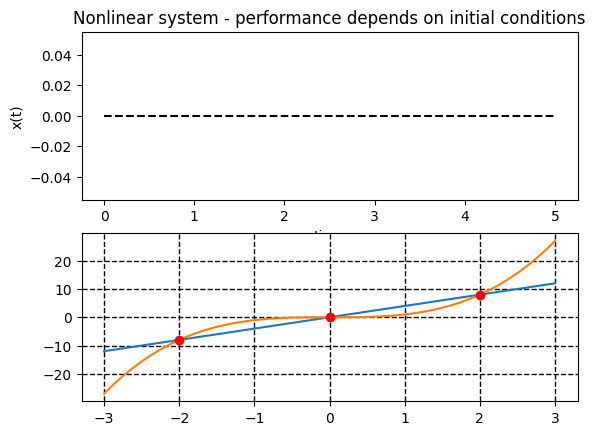

In [15]:
#https://docs.sympy.org/latest/guides/solving/solve-ode.html

from sympy import symbols, lambdify
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
# Create symbols x - example by Josenalde Oliveira@ufrn@2024
x = symbols('x')
t = symbols('t')

# Derivative of the function f(t);
xdot = [-4*x + x**3]

# Convert the SymPy symbolic expression for xdot into a form that
# SciPy can evaluate numerically,
f = lambdify((t, x), xdot)
x0_1 = [2.01] # initial condition (initial values)
x0_2 = [0.5] # initial condition (initial values)
x0_3 = [-2] # initial condition (initial values)
x0_4 = [-0.5] # initial condition (initial values)
t_eval = np.linspace(0, 5, 50) # evaluate integral from t = 0-10 for 50 points

# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f

try:
  solution_1 = scipy.integrate.solve_ivp(f, (0, 5), x0_1, t_eval = t_eval)
  solution_2 = scipy.integrate.solve_ivp(f, (0, 5), x0_2, t_eval = t_eval)
  solution_3 = scipy.integrate.solve_ivp(f, (0, 5), x0_3, t_eval = t_eval)
  solution_4 = scipy.integrate.solve_ivp(f, (0, 5), x0_4, t_eval = t_eval)
except:
  print('numerical error when integrating')

# Extract the x values from SciPy solution result
x_1 = solution_1.y
x_2 = solution_2.y
x_3 = solution_3.y
x_4 = solution_4.y

# Plot the result graphically using matplotlib
try:
  plt.subplot(211)
  plt.plot(t_eval, x_1.T, t_eval, x_2.T, t_eval, x_3.T, t_eval, x_4.T)
  plt.legend(['x_0={}'.format(x0_1), 'x_0={}'.format(x0_2), 'x_0={}'.format(x0_3), 'x_0={}'.format(x0_4)], shadow=True)
except ValueError:
  print('numerical error for dynamics plot')

# Plot 0-line (equilibrium point)
x_axis = 0*np.array(t_eval)
plt.plot(t_eval, x_axis, 'k--')

# Add title, legend, and axis labels to the plot
plt.title('Nonlinear system - performance depends on initial conditions')
plt.xlabel('time')
plt.ylabel('x(t)')

x_eval = np.linspace(-3, 3, 50)
f_1 = 4*x_eval
f_2 = x_eval**3
plt.subplot(212)
plt.grid(color='k', linestyle='--', linewidth=1)
plt.plot(x_eval, f_1, x_eval, f_2)
plt.plot(-2,-8, 'ro', 0, 0, 'ro', 2, 8, 'ro')
# Finally, display the annotated plot
plt.show()